In [15]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

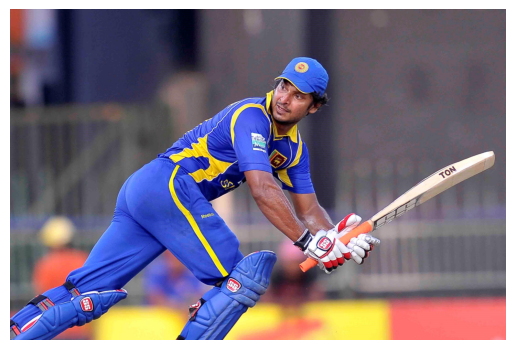

In [16]:
x = cv2.imread("0030_01.jpg")
x_rgb = cv2.cvtColor(x,cv2.COLOR_BGR2RGB)
plt.imshow(x_rgb)
plt.axis('off')
plt.show()

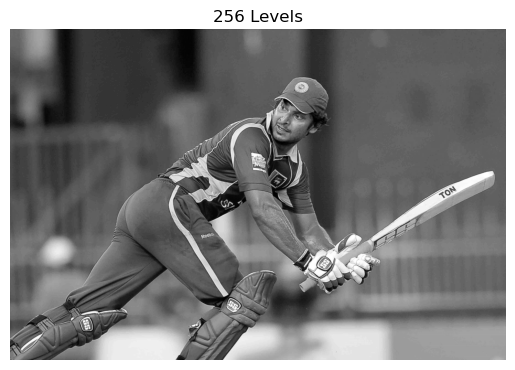

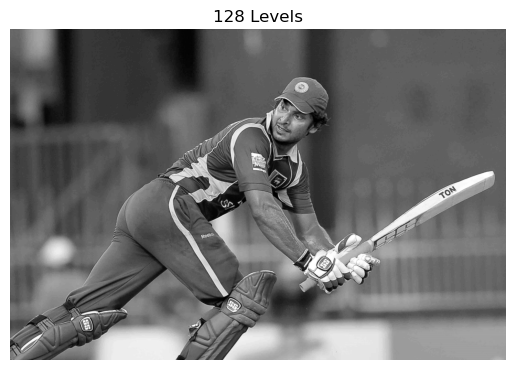

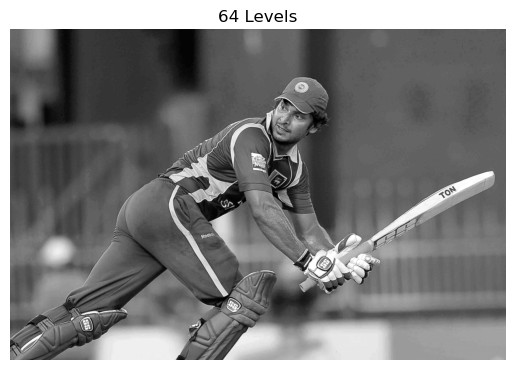

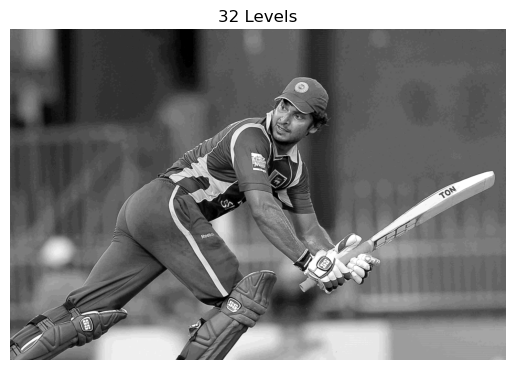

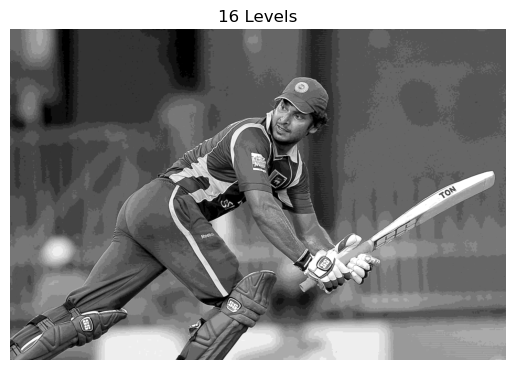

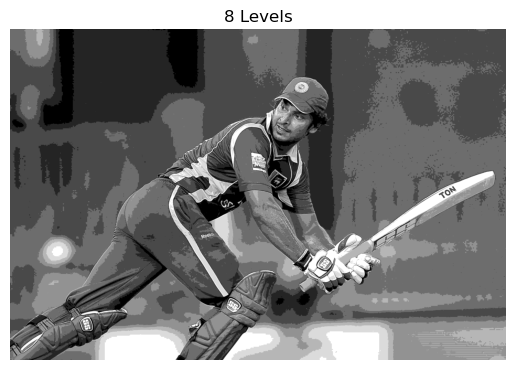

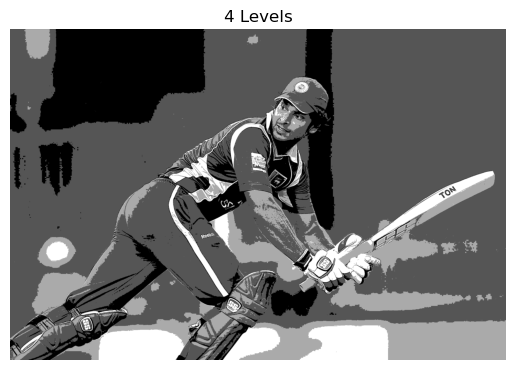

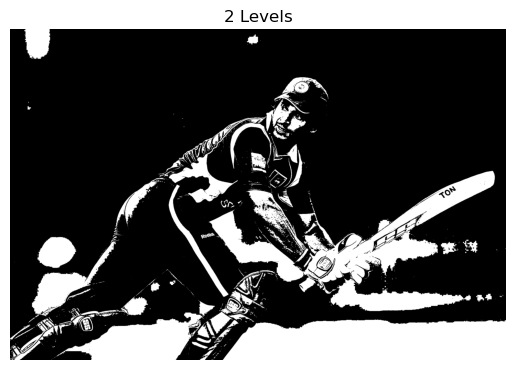

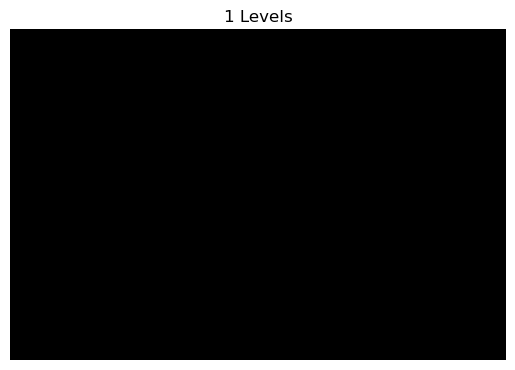

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image = cv2.imread("0030_01.jpg", cv2.IMREAD_GRAYSCALE)

Quantization_Level_list = [256, 128, 64, 32, 16, 8, 4, 2, 1]

output_dir = "quantized_outputs"
os.makedirs(output_dir, exist_ok=True)

for level in Quantization_Level_list:
    step = 256 // level
    quantized = (image // step) * step

    output_path = os.path.join(output_dir, f"quantized_{level}_levels.jpg")
    cv2.imwrite(output_path, quantized)

    plt.imshow(quantized, cmap='gray')
    plt.title(f'{level} Levels')
    plt.axis('off')
    plt.show()


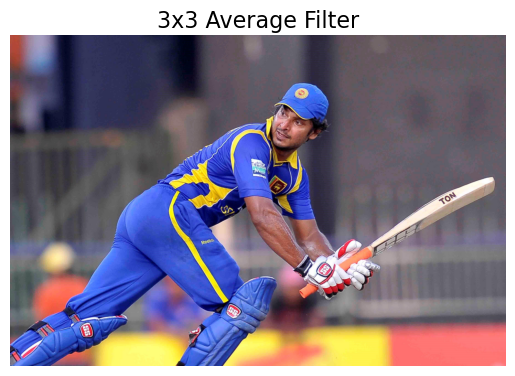

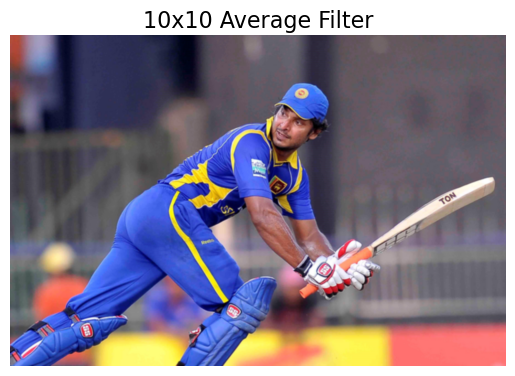

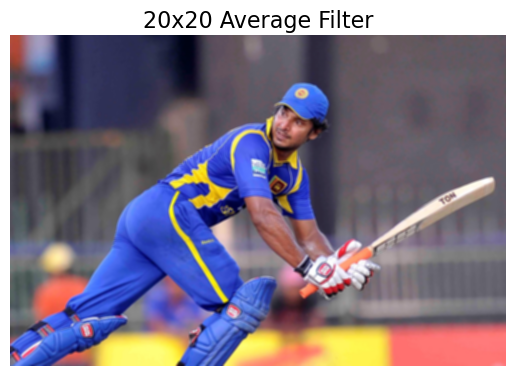

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

image = cv2.imread("0030_01.jpg")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def average_filter(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)
    filtered = cv2.filter2D(img, -1, kernel)
    return filtered


Avg_filter_sizes = [3, 10, 20]

output_dir = "average_filtered_outputs"
os.makedirs(output_dir, exist_ok=True)

for fil_size in Avg_filter_sizes:
    avg_bgr = average_filter(image, fil_size)  
    avg_rgb = cv2.cvtColor(avg_bgr, cv2.COLOR_BGR2RGB)  

    filename = f"average_filter_{fil_size}x{fil_size}.jpg"
    filepath = os.path.join(output_dir, filename)
    cv2.imwrite(filepath, avg_bgr)

    plt.imshow(avg_rgb)
    plt.title(f"{fil_size}x{fil_size} Average Filter", fontsize=12)
    plt.axis('off')
    plt.show()


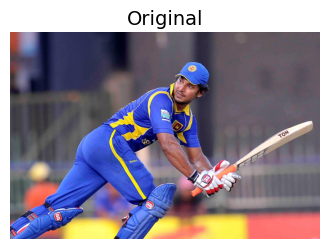

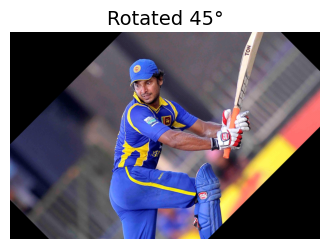

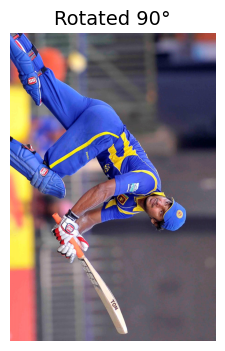

In [5]:
import cv2
import matplotlib.pyplot as plt
import os

img_bgr = cv2.imread('0030_01.jpg')

img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

(h, w) = img.shape[:2]
center = (w // 2, h // 2)

M_45 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(img, M_45, (w, h))

rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

output_dir = "rotation_outputs"
os.makedirs(output_dir, exist_ok=True)

cv2.imwrite(os.path.join(output_dir, "original.jpg"), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(output_dir, "rotated_45.jpg"), cv2.cvtColor(rotated_45, cv2.COLOR_RGB2BGR))
cv2.imwrite(os.path.join(output_dir, "rotated_90.jpg"), cv2.cvtColor(rotated_90, cv2.COLOR_RGB2BGR))

images = [img, rotated_45, rotated_90]
titles = ['Original', 'Rotated 45°', 'Rotated 90°']

for i in range(len(images)):
    plt.figure(figsize=(4, 4))
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=14)
    plt.axis('off')
    plt.show()


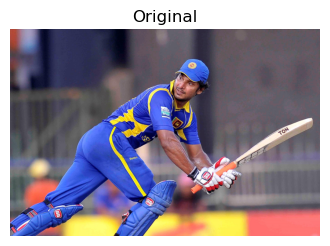

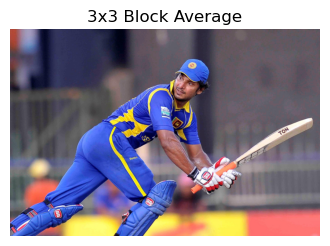

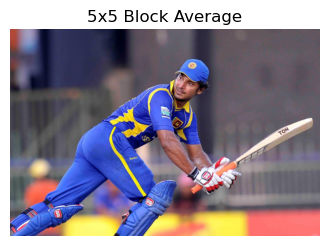

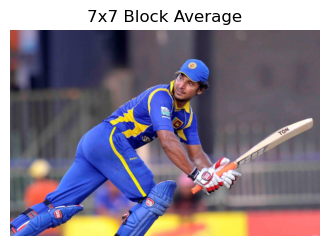

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img_bgr = cv2.imread('0030_01.jpg')
img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

output_dir = "block_average_outputs"
os.makedirs(output_dir, exist_ok=True)

def block_average(img, block_size):
    h, w = img.shape[:2]
    h_crop = h - (h % block_size)
    w_crop = w - (w % block_size)
    img_cropped = img[:h_crop, :w_crop]
    output = np.zeros_like(img_cropped)

    for i in range(0, h_crop, block_size):
        for j in range(0, w_crop, block_size):
            block = img_cropped[i:i+block_size, j:j+block_size]
            avg_color = np.mean(block, axis=(0, 1), dtype=int)
            output[i:i+block_size, j:j+block_size] = avg_color

    return output

block_sizes = [1, 3, 5, 7]
titles = ['Original', '3x3 Block Average', '5x5 Block Average', '7x7 Block Average']


for idx, bsize in enumerate(block_sizes):
    avg_img = block_average(img, bsize)

    
    filename = f"block_average_{bsize}x{bsize}.jpg"
    save_path = os.path.join(output_dir, filename)
    cv2.imwrite(save_path, cv2.cvtColor(avg_img, cv2.COLOR_RGB2BGR))

    
    plt.figure(figsize=(4, 4))
    plt.imshow(avg_img)
    plt.title(titles[idx])
    plt.axis('off')
    plt.show()
